In [2]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img_path = "KITTI_Selection/images/006037.png"
image = cv2.imread(img_path)

In [4]:
with open('KITTI_Selection/labels/006037.txt', 'r', encoding='utf-8') as f:
    content = f.read()
    stripped_content = content.strip()
    print(content)

allcoords = []

for line in stripped_content.split('\n'):
    line_content = line.split(' ')
    coords = line_content[1:5]
    allcoords.append(coords)
    print(coords)

print(allcoords)

Car 664.33 174.8 743.04 239.61 17.309777537116815
Car 532.68 172.05 576.93 209.92 31.335887346157413
Car 659.73 177.04 706.5 221.85 23.63553261286652
Car 651.86 170.46 694.95 209.64 29.640773466045783
Car 643.29 172.22 681.11 204.34 34.92210622856619

['664.33', '174.8', '743.04', '239.61']
['532.68', '172.05', '576.93', '209.92']
['659.73', '177.04', '706.5', '221.85']
['651.86', '170.46', '694.95', '209.64']
['643.29', '172.22', '681.11', '204.34']
[['664.33', '174.8', '743.04', '239.61'], ['532.68', '172.05', '576.93', '209.92'], ['659.73', '177.04', '706.5', '221.85'], ['651.86', '170.46', '694.95', '209.64'], ['643.29', '172.22', '681.11', '204.34']]


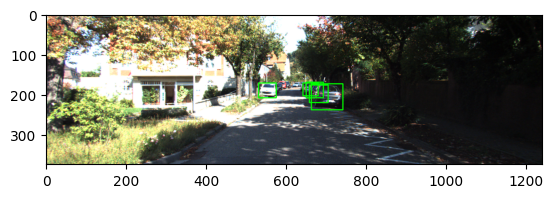

In [8]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

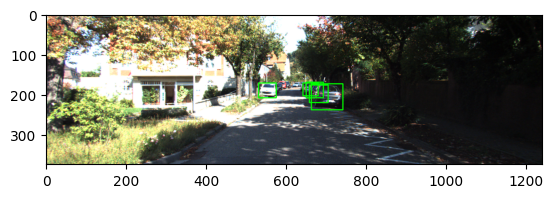

In [7]:
for i in allcoords:
    coords = [int(float(j)) for j in i]
    boxed = cv2.rectangle(image, (coords[0], coords[1]), (coords[2], coords[3]), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(boxed, cv2.COLOR_BGR2RGB))

plt.show()

In [9]:
cv2.imwrite('labelled.jpg', image)

True

In [ ]:
# Create a new YOLO model from scratch
model = YOLO("yolo11n.yaml")

# Load a pretrained YOLO model (recommended for training)
model = YOLO("yolo11n.pt")

# Train the model using the 'coco8.yaml' dataset for 3 epochs
results = model.train(data="coco8.yaml", epochs=3)

In [ ]:
# Evaluate the model's performance on the validation set
results = model.val()

In [ ]:
results = model(img_path)

In [ ]:
success = model.export(format="onnx")

In [ ]:
img = cv2.imread("KITTI_Selection/images/006037.png")

for result in results[0]:
    # print(result.boxes.xyxy)
    # print(result.boxes.conf)
    # print(result.boxes.cls)
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

cv2.imwrite('output_detected.jpg', img)
cv2.imshow('YOLO Detection', img)
cv2.waitKey(0)
cv2.destroyAllWindows()